In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","

In [5]:
import plotnine

from plotnine import (
    ggplot,
    aes,
    after_stat,
    geom_histogram,
    facet_wrap,
    facet_grid,
    coord_flip,
    scale_y_continuous,
    scale_y_sqrt,
    scale_y_log10,
    scale_fill_manual,
    theme_bw,
    theme_xkcd

)

In [6]:
def getVal(mypath, filename, header="infer",names = None):
    fullpath = pathresults +mypath+filename
    if names is None:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header).dropna(how= "all", axis=1)
    else:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header, names = names).dropna(how= "all", axis=1)
    return cst
def get_last_line_as_numpy_array(file_path, dtype = float):
    with open(pathresults +file_path, 'r') as file:
        # Read all lines
        lines = file.readlines()

        # Check if there are any lines in the file
        if not lines:
            raise ValueError("The file is empty")

        # Get the last line
        last_line = lines[-1].strip()

        # Split the last line by commas and convert to NumPy array
        array_from_last_line = np.array(last_line.split(','), dtype=dtype)

        return array_from_last_line

In [55]:
# cylinder max konz (per cell)
def getData_(name, cid,gId,path2file):
    fileName = "Cyl_cellVol_"+str(gId)+".txt"
    cVol = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
    if cid <= 2 and cid > 0:
        fileName = "Cyl_watercontent_"+str(gId)+".txt"
        theta = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
        cVol *= theta
    fileName = name+str(gId)+".txt"
    Q1 = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
    konz = sum(Q1)/sum(cVol) #mol/cm3 or cm3/cm3
    return konz

def getData():
    GiniAll = [[[] for i in range(99)] for ii in range(9)]
    for pSet in range(99):

        path2file = 'none_55_'+str(pSet)+'_10to11_20mn_0s_5/'
        rr = get_last_line_as_numpy_array(path2file+"root_segments_tips.txt", dtype =int)

        for cid in range(9):
            Ginits = np.full(len(rr),np.nan)
            for idx, gId in enumerate(rr):
                if cid == 0:
                    namedata = "Cyl_watercontent_"
                else:
                    namedata = "Cyl_content"+str(cid)+"_"
                Ginits[idx] = getData_(namedata, cid, gId,path2file)                
            GiniAll[cid][pSet] = Ginits
    return GiniAll #cid pSet rr
    

In [56]:
GiniAll = getData()

In [58]:
# get param set
paramsets =  pd.read_csv('../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2']
column_names = outputvalsname + paramsets.columns.tolist()
df = pd.DataFrame(columns=column_names)

for pset in range(99):
    N = GiniAll[0][pset].shape[0]
    rows_to_duplicate_df = pd.DataFrame(paramsets.iloc[pset]).T
    duplicated_rows_df = rows_to_duplicate_df.loc[np.repeat(rows_to_duplicate_df.index.values, N)]
    # Duplicate the specific rows N times
    for jj, outVn in enumerate(outputvalsname):
        duplicated_rows_df[outVn] = GiniAll[jj][pset]

    # Concatenate the original DataFrame with the duplicated specific rows
    df = pd.concat([df, duplicated_rows_df], ignore_index=True)

In [60]:
df.shape

(6336, 36)

In [61]:
df['co'] = df['coa']+df['cod']
df['cc'] = df['cca']+df['ccd']

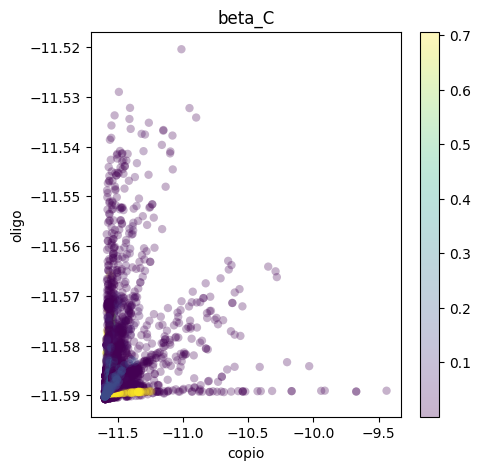

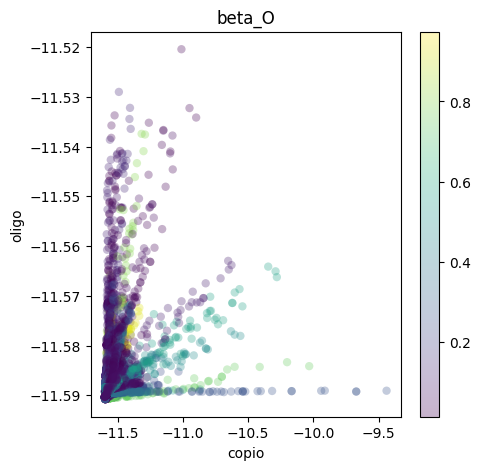

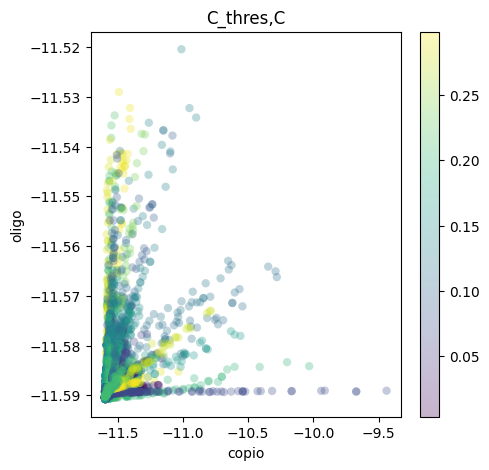

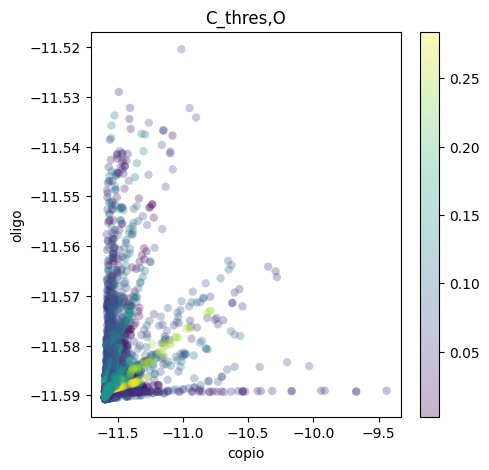

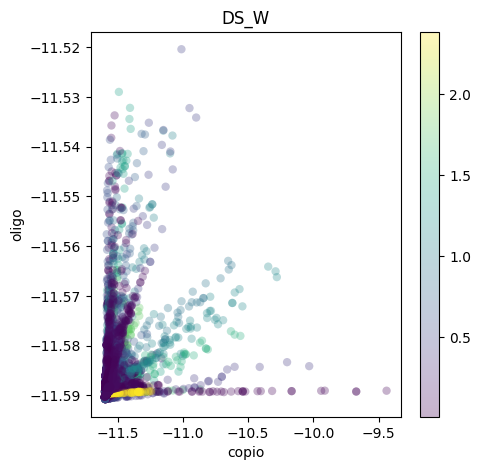

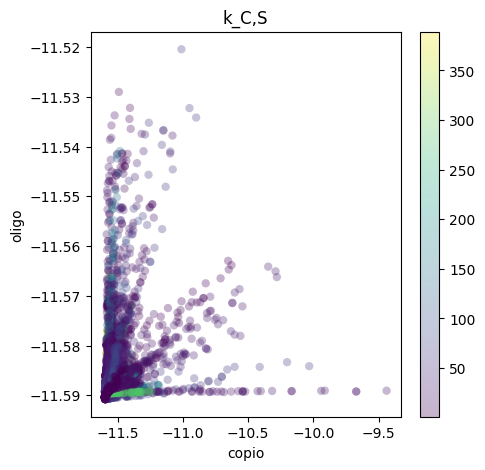

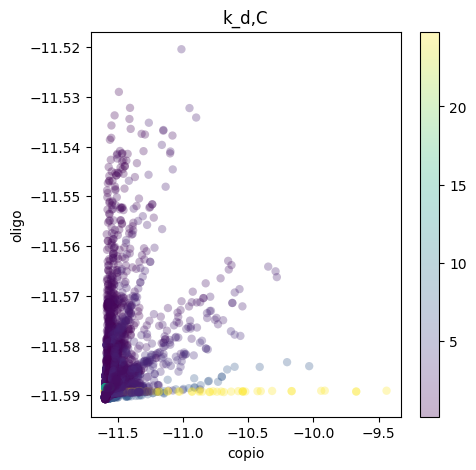

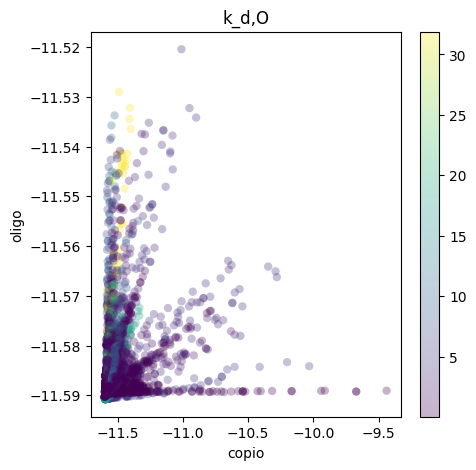

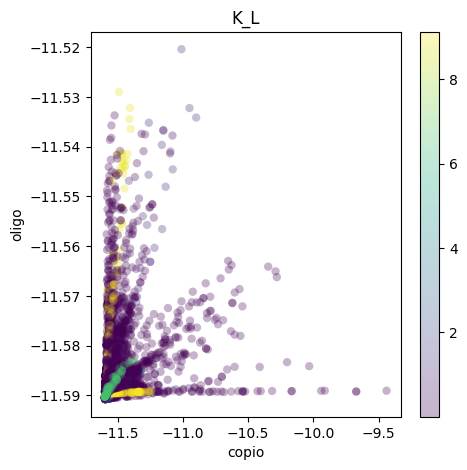

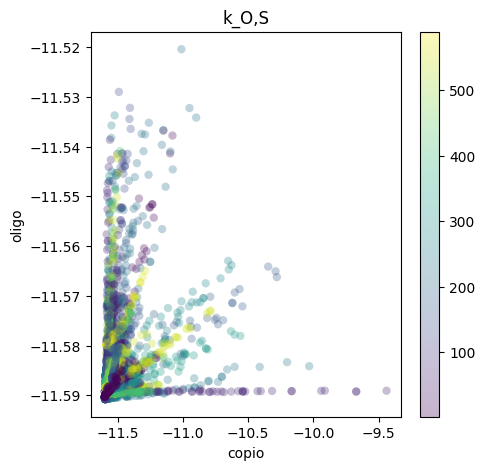

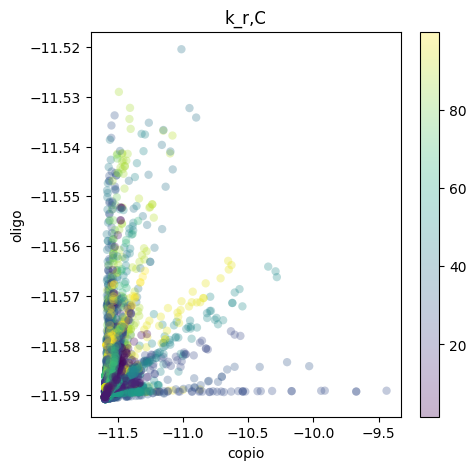

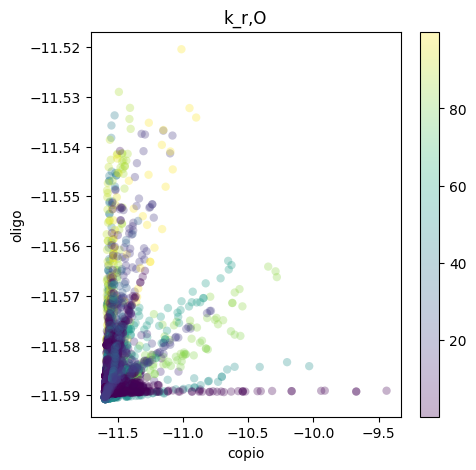

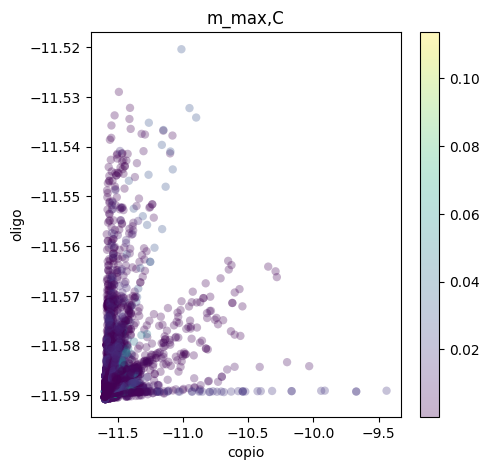

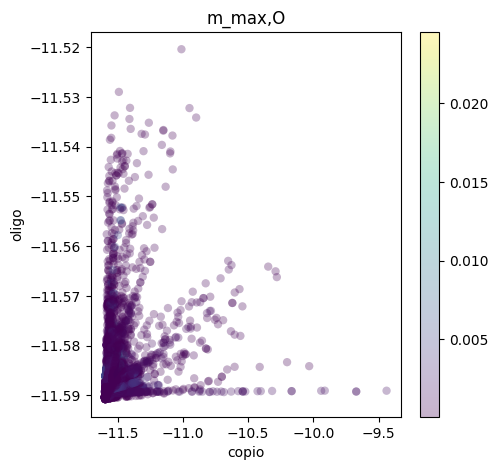

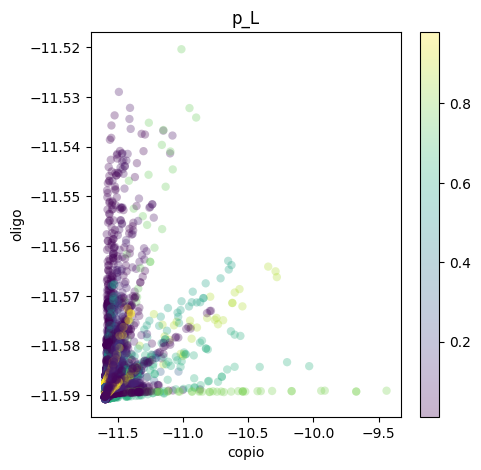

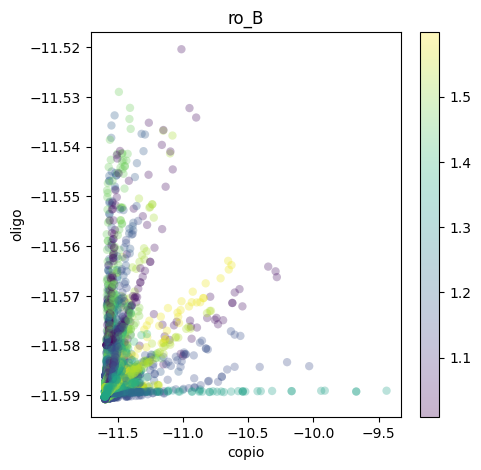

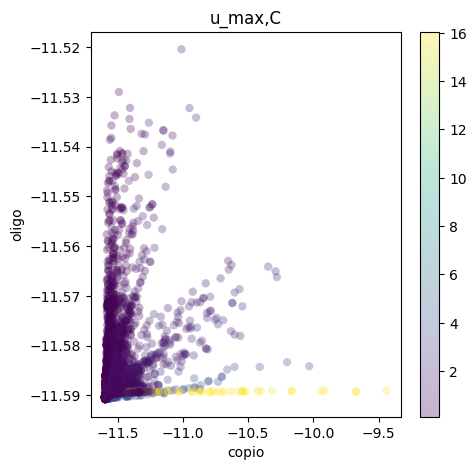

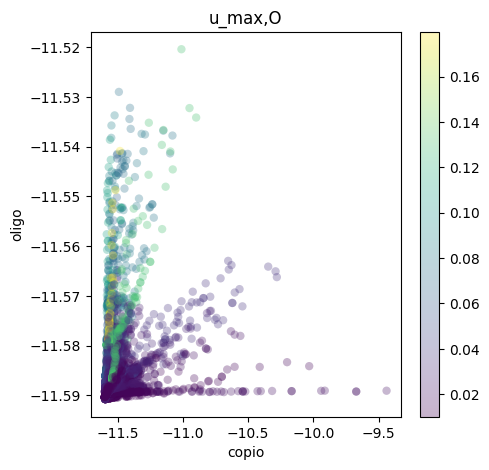

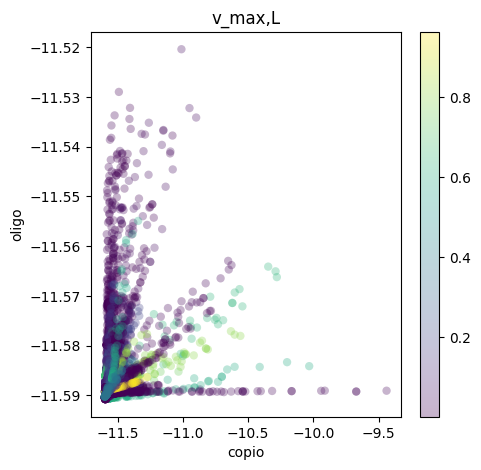

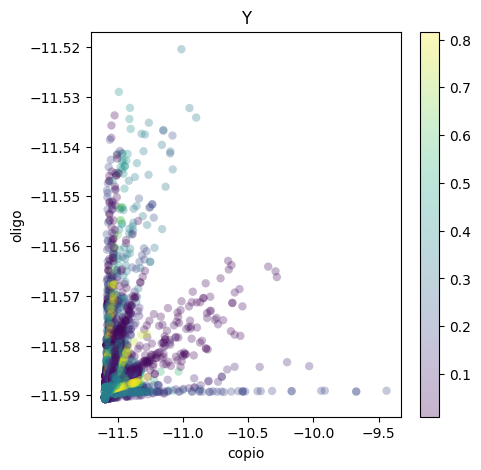

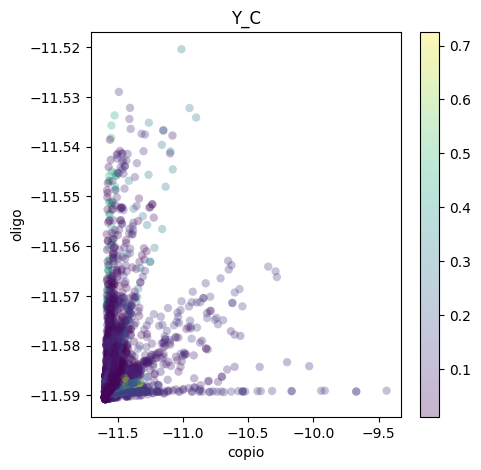

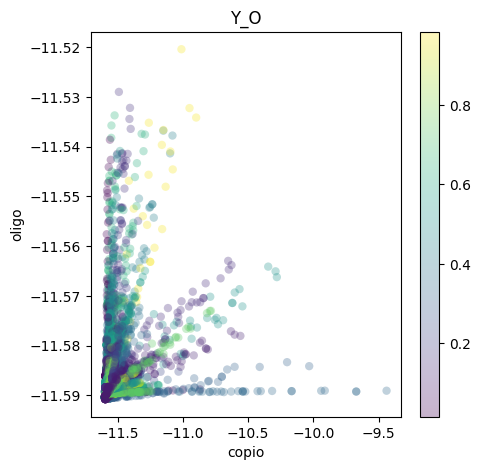

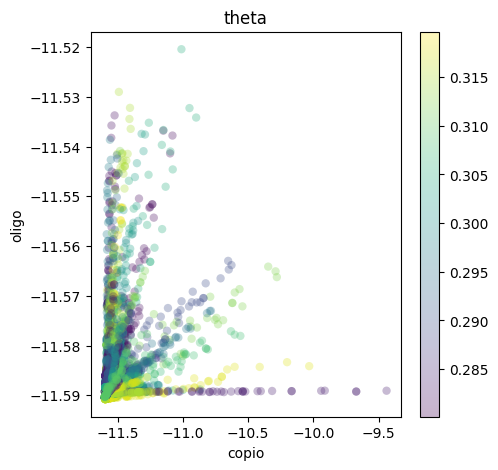

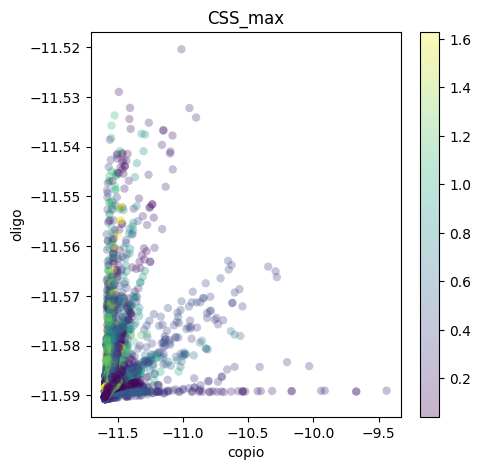

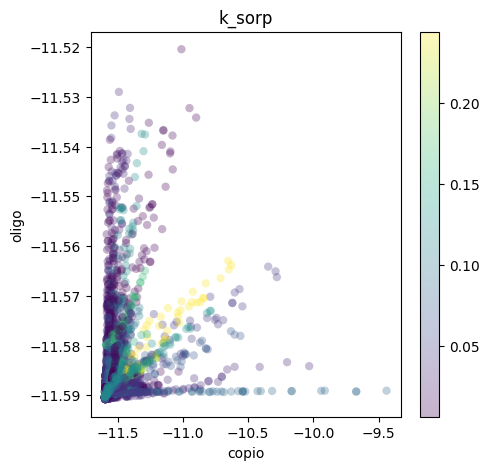

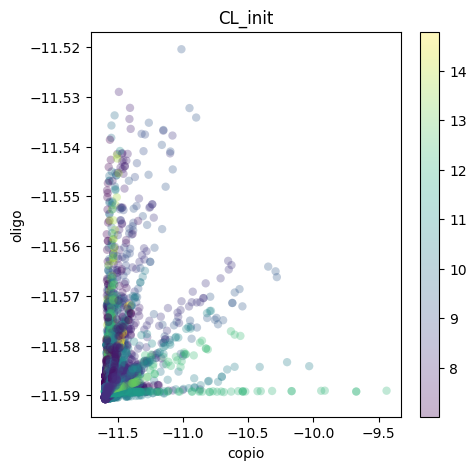

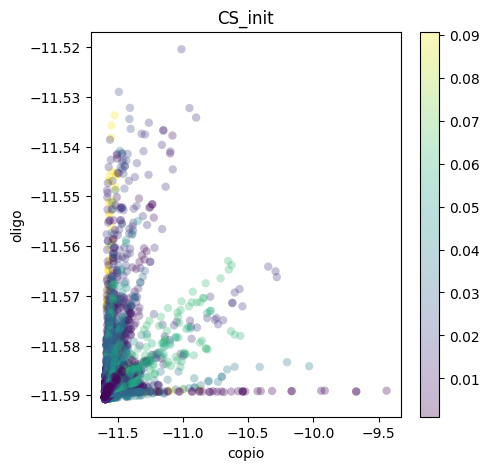

In [62]:
for nn in paramsets.columns.tolist():
    plt.scatter(np.log(df['cc']),np.log(df['co']), 
                c=df[nn],
                alpha=0.3, edgecolors ='none')
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.xlabel('copio')
    plt.ylabel('oligo')
    plt.show()

In [13]:
# cylinder max konz (per cell)
def getData_old(cid, doplus1 = True):
    GiniMeans = np.full(99,np.nan)
    GiniAll =[[] for i in range(99)]
    for pSet in range(99):

        path2file = 'none_55_'+str(pSet)+'_10to11_20mn_0s_5/'
        rr = get_last_line_as_numpy_array(path2file+"root_segments_tips.txt", dtype =int)

        Ginits = np.full(len(rr),np.nan)
        for idx, gId in enumerate(rr):
            #gId = rr[0]
            fileName = "Cyl_cellVol_"+str(gId)+".txt"
            cVol = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
            fileName = "Cyl_content"+str(cid)+"_"+str(gId)+".txt"
            Q1 = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
            if doplus1:
                fileName = "Cyl_content"+str(cid+1)+"_"+str(gId)+".txt"
                Q2 = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
                Q1 += Q2

            konz = Q1/cVol #mol/cm3
            Ginits[idx] = max( Q1/cVol)
        GiniMeans[pSet] = max(Ginits)
        GiniAll[pSet] = Ginits
    return GiniAll
#df_copio = getData(5)
#df_copio = getData(3)

In [17]:
df_troph = pd.DataFrame(
    {'copio': np.array(df_copio).reshape(-1),
     'oligo':np.array( df_oligo).reshape(-1)
    })

In [23]:
print(max( np.array(df_copio).reshape(-1)),max( np.array(df_oligo).reshape(-1)))

0.005347874907749166 1.225755980946036e-05


In [26]:
# get param set
paramsets =  pd.read_csv('../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)

column_names = ['wat','cs','cl','coa','cod','cca','ccd','css2','co2']+paramsets.columns.tolist()
df = pd.DataFrame(columns=column_names)
for pset in range(99):
    N = df_copio[pset].shape[0]
    rows_to_duplicate_df = pd.DataFrame(paramsets.iloc[pset]).T
    duplicated_rows_df = rows_to_duplicate_df.loc[np.repeat(rows_to_duplicate_df.index.values, N)]
    # Duplicate the specific rows N times
    duplicated_rows_df['copio']=df_copio[pset]
    duplicated_rows_df['oligo']=df_oligo[pset]

    # Concatenate the original DataFrame with the duplicated specific rows
    df = pd.concat([df, duplicated_rows_df], ignore_index=True)

In [44]:
nn

'b'

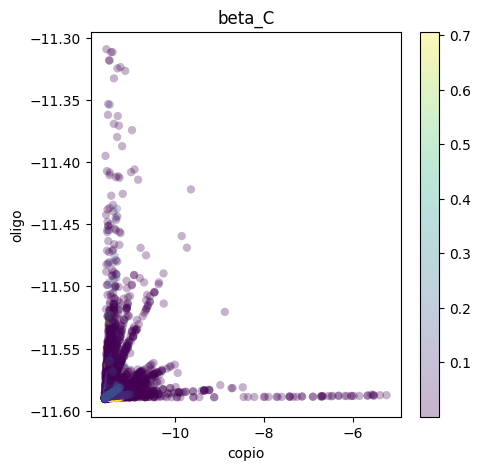

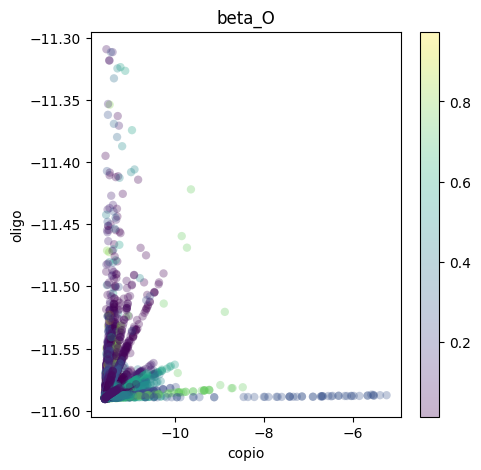

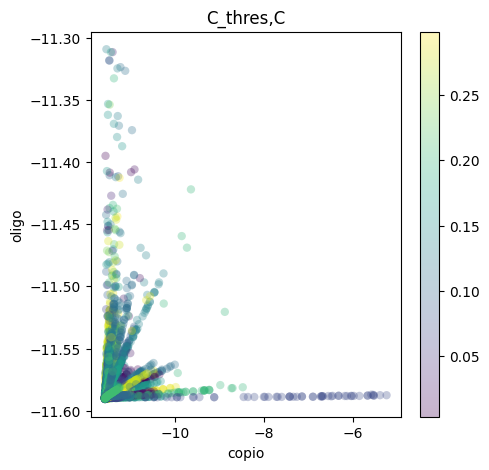

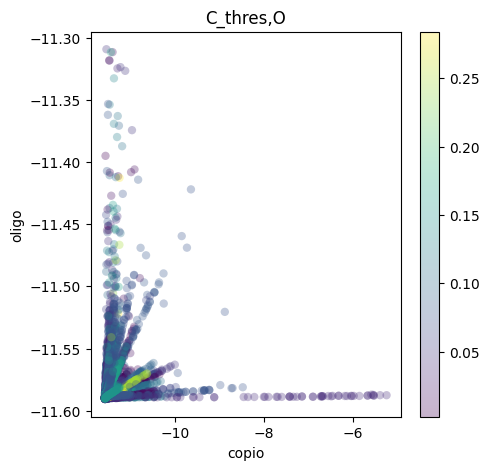

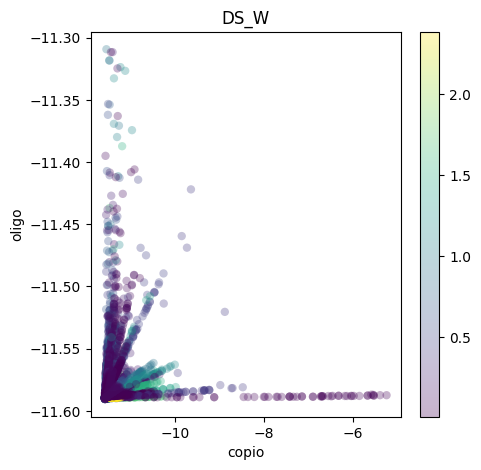

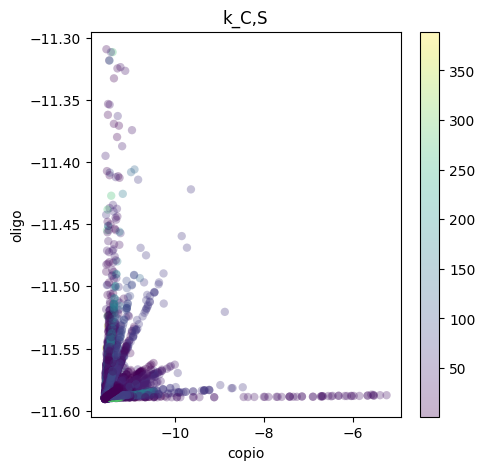

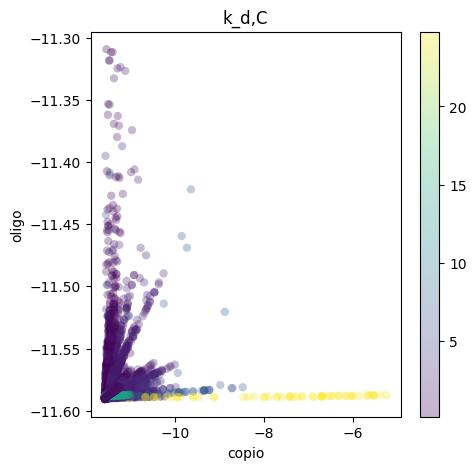

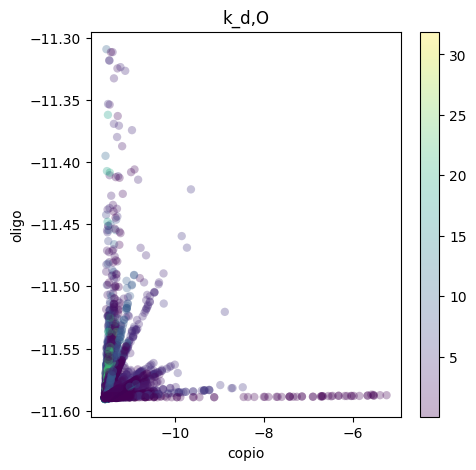

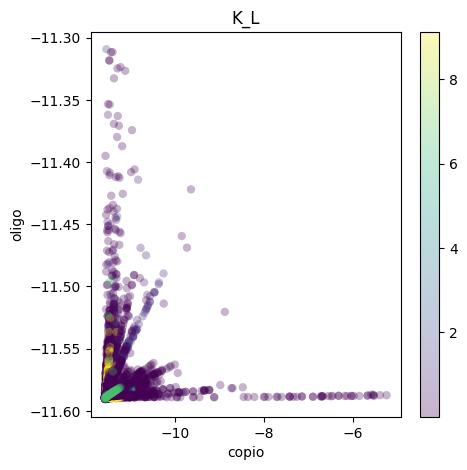

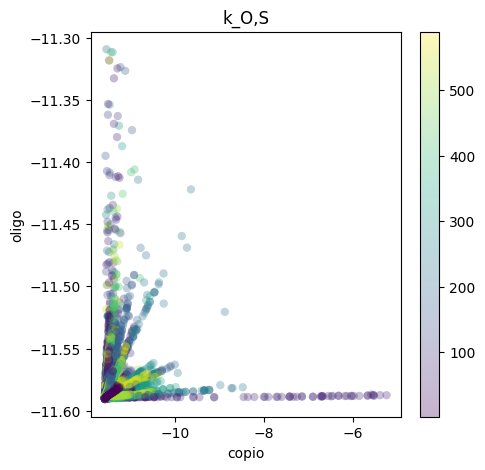

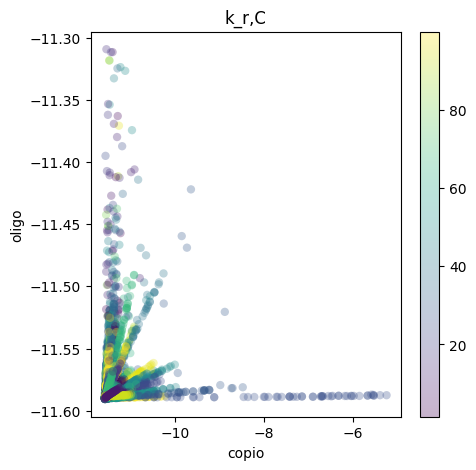

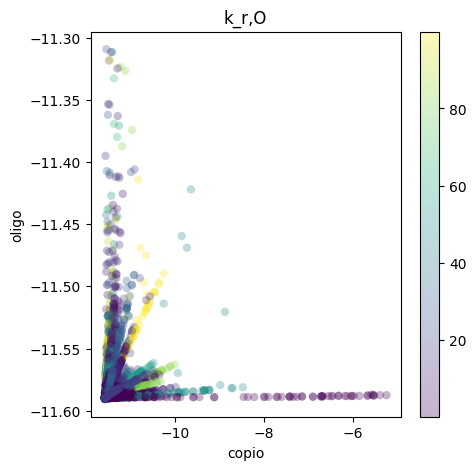

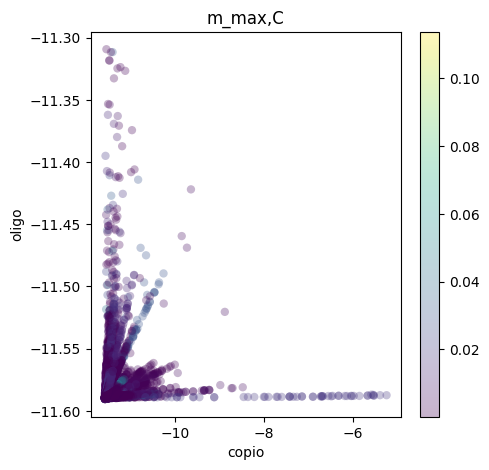

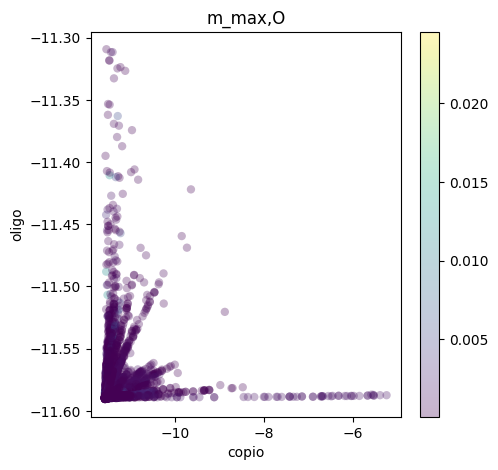

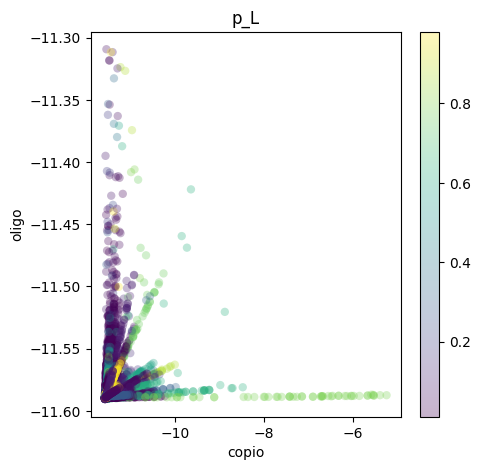

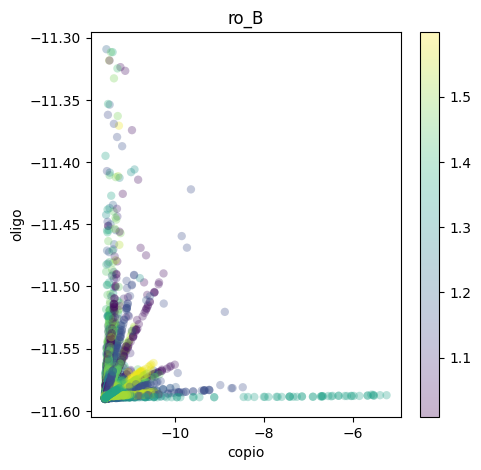

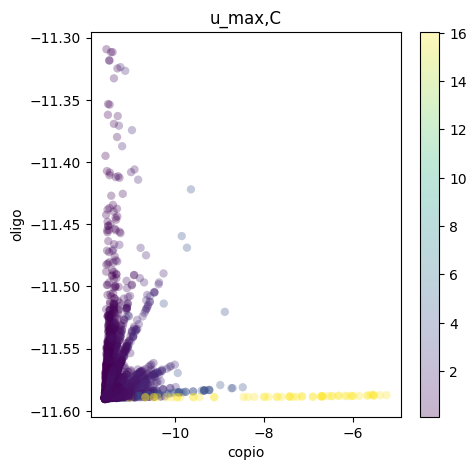

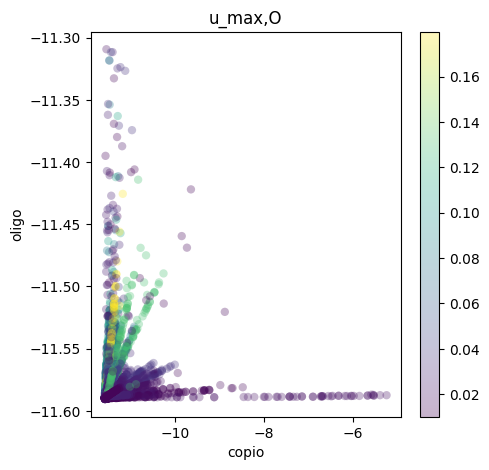

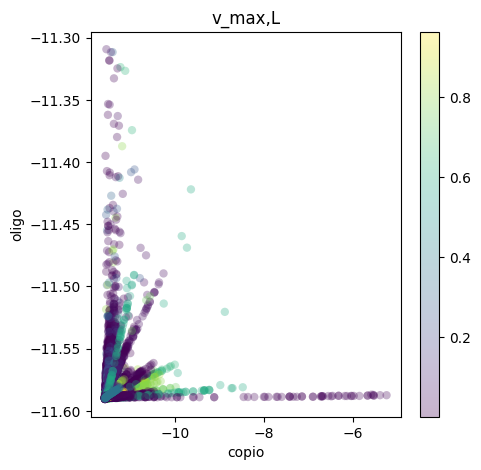

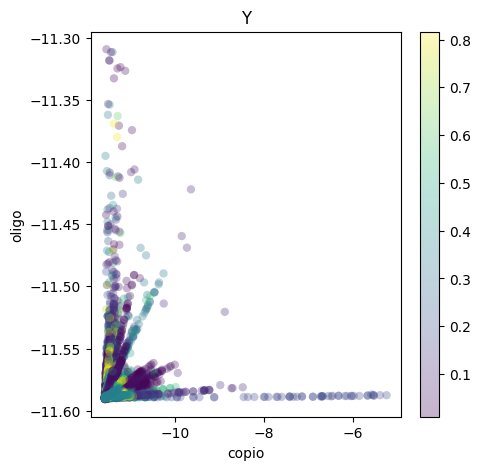

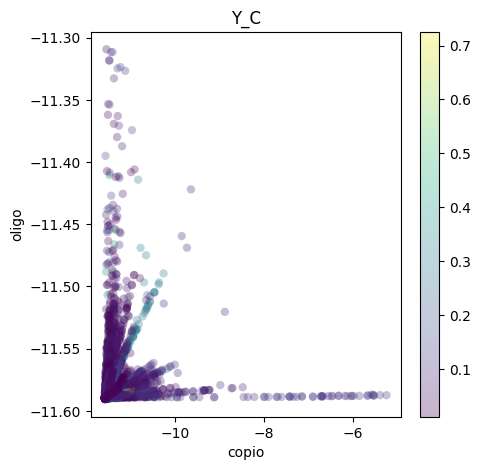

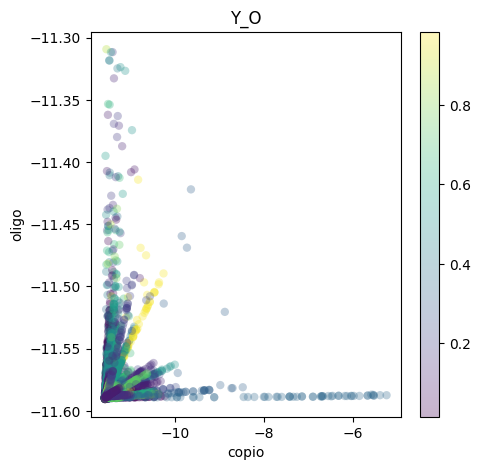

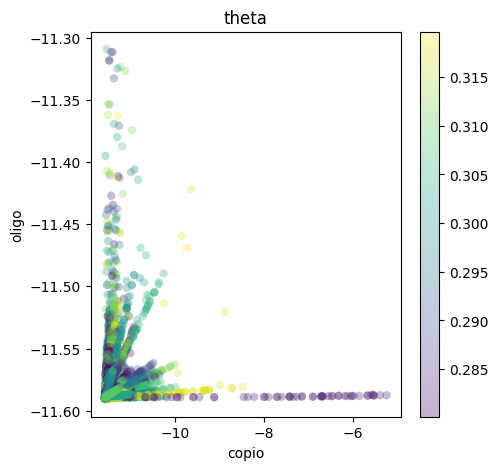

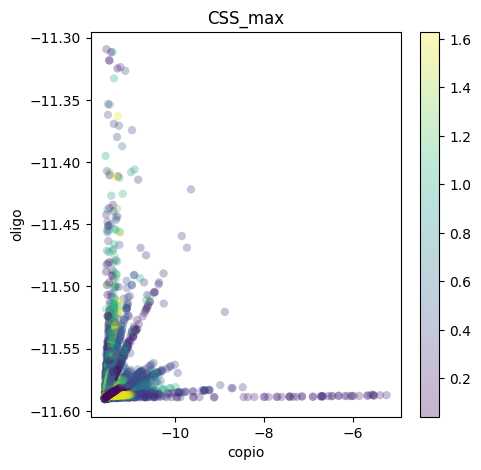

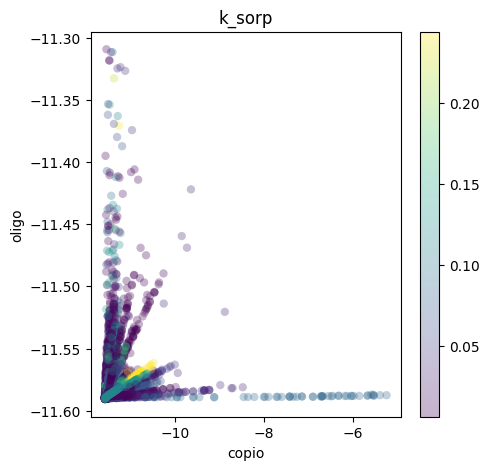

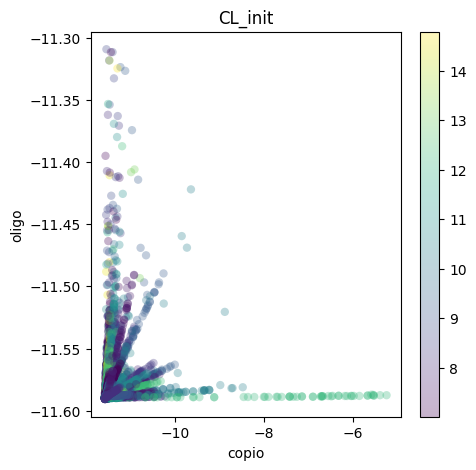

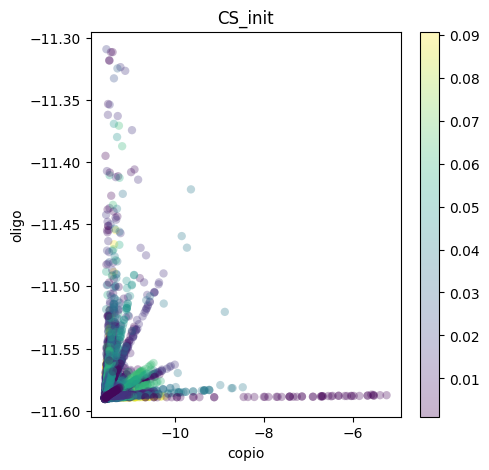

In [48]:
for nn in paramsets.columns.tolist():
    plt.scatter(np.log(df['copio']),np.log(df['oligo']), 
                c=df[nn],
                alpha=0.3, edgecolors ='none')
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.xlabel('copio')
    plt.ylabel('oligo')
    plt.show()

In [ ]:
paramsets

In [26]:
problem = {
        'num_vars': len(GiniMeans),
        'names': namesVars_phlo,
        'bounds': namesLim_phlo
    }

0.00034320317119243456


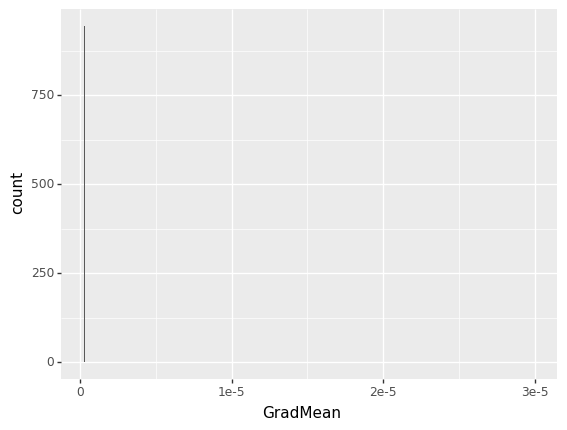

<ggplot: (8794740057697)>

In [34]:
(
    ggplot(data0, aes(x='GradMean'))
    + geom_histogram(bins = np.floor(len(data0['GradMean'])))
)

In [ ]:
#better histokonz for cylindesr
GiniMeans = []
for pSet in range(99):
    path2file = pathresults + 'param99none'+str(pSet)+'0dx_2dumux_10c_10.0to11.0_20mn_0s_192_100/'
    rr = get_last_line_as_numpy_array(path2file+"root_segments_tips.txt")
    Ginits = np.full(len(rr),np.nan)
    print('\npSet',pSet, 'len(rr)',len(rr))
    for idx, gId in enumerate(rr):
        print('rootid',idx, end =", ")
        #gId = rr[0]
        fileName = "Cyl_cellVol_"+str(gId)+".txt"
        cVol = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
        fileName = "Cyl_content1_"+str(gId)+".txt"
        Q1 = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
        fileName = "Cyl_watercontent_"+str(gId)+".txt"
        theta = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
        fileName = "Cyl_coord_"+str(gId)+".txt"
        dofc = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
        watVol = theta * cVol
        if False:
            konz = Q1/cVol #mol/cm3
        else:
            konz = Q1/watVol #mol/cm3
        Ginits[idx] = (np.diff( Q1/cVol)/np.diff(dofc))[0]
    GiniMeans[pSet] = np.mean(Ginits)